### Demonstration of the numerical solution for the second order ordinary differential equation for $x*sin(x)$


Tiffany Kashima
MAT421
4/10/2022

- Runge Kutta method for numerically solving ODEs

Given:
${{dy(t)} \over {dt}} = f(y(t),t)$

${k_1}f({y^*}({t_0}),\;{t_0})$

$t = {t_0}$

${y_1}\left( {{t_0} + {h \over 2}} \right) = {y^*}({t_0}) + {k_1}{h \over 2}$

$t = {t_0} + {h \over 2}$

${k_2} = f( {{y_1}{{t_0} + {h \over 2})}}$

${t_0} + {h \over 2}$

$t = {t_0} + {h \over 2}$

${y^*}\left( {{t_0} + h} \right) = {y^*}({t_0}) + {k_2}h$

$y( {{t_0} + h})$



In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# iterative Euler method as defined in pervious notebook for numerical solutions to ODEs
def euler(f, x0, t):

    n = len(t)
    x = np.array( [x0] * n )
    for i in range( n - 1 ):
        x[i+1] = x[i] + ( t[i+1] - t[i] ) * f( x[i], t[i] )

    return x


In [4]:
# second order (RK2) improves on Euler
def rk2b(f, x0, t):

    n = len(t)
    x = np.array([ x0 ] * n)
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = h * f( x[i], t[i] )
        k2 = h * f( x[i] + k1, t[i+1] )
        x[i+1] = x[i] + (k1 + k2) / 2.0

    return x

In [6]:
# define function to test methods (x*sin(t))
def f(x, t):
        return x * np.sin( t )

# interval and intial x pt
a, b = (0.0, 10.0)
x0 = -1.0

# create grid and define n, define toelrance for accuracy
n = 51
t = np.linspace(a, b, n)
h = t[1] - t[0]
tol = 1e-6

x_rk2 = rk2b(f, x0, t)
x_euler = euler(f, x0, t)

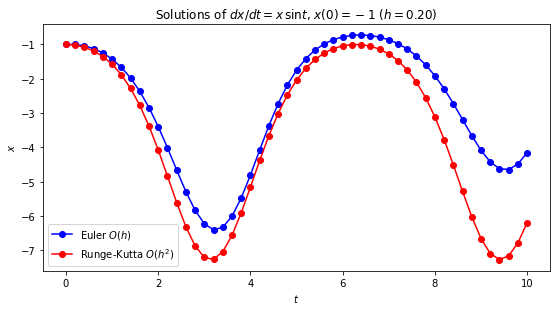

In [12]:
#true solution
x = -np.exp(1.0 - np.cos(t))

# plot answers using euler and RK
plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(2,2,1)
plt.plot( t, x_euler, 'b-o', t, x_rk2, 'r-o' )
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.title( 'Solutions of $dx/dt = x\,\sin t$, $x(0)=-1$ ($h = %4.2f$)' % h)
plt.legend(('Euler $O(h)$', 'Runge-Kutta $O(h^2)$'), loc='lower left')
plt.show()